In [1]:
!python --version

Python 3.13.0


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
 
from sklearn.cluster import KMeans
from sklearn import datasets

In [3]:
## Load dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target
 
## Fit KMeans model
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)


c:\Users\kfich\anaconda3\envs\mldp\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


c:\Users\kfich\anaconda3\envs\mldp\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\kfich\anaconda3\envs\mldp\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\kfich\anaconda3\envs\mldp\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\kfich\anaconda3\envs\mldp\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows wi

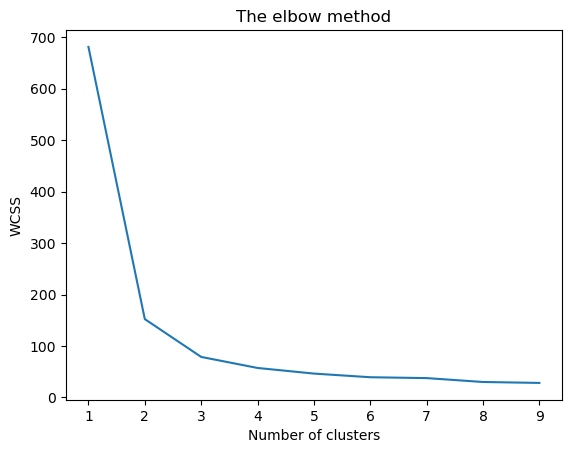

In [5]:
## Elbow method to find optimal number of clusters
WCSS = []
 
for clusters in range(1,10):
    kmeans = KMeans(n_clusters=clusters)
    kmeans.fit(X)
    WCSS.append(kmeans.inertia_)
 
plt.plot(range(1,10), WCSS)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [4]:
## Get cluster labels for each data point
cluster_labels = kmeans.labels_
 
## Combine with original data
df = pd.DataFrame(X, columns=iris.feature_names)
df['cluster'] = cluster_labels
df['species'] = y # true labels for comparison
 
## Interactive 3D plot
import plotly.express as px
 
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Blue, Orange, Green
df['species_str'] = df['species'].astype(str)  # convert to string for symbol
 
fig = px.scatter_3d(
    df,
    x=iris.feature_names[0],  # Sepal length
    y=iris.feature_names[1],  # Sepal width
    z=iris.feature_names[2],  # Petal length
    color='cluster',           # K-Means cluster
    symbol='species_str',      # True species (as string)
    title='Iris Clusters in 3D (K-Means)',
    opacity=0.7,
    color_discrete_sequence=colors
)
 
fig.update_traces(marker=dict(size=6))
 
fig.update_layout(
    legend=dict(x=1.1, y=1),
    margin=dict(l=0, r=150, t=50, b=0)
)
 
fig.show()

In [6]:
from sklearn.decomposition import PCA
 
# Apply PCA (reduce to 2 components for 2D plot)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
 
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['species_str'] = y.astype(str)
 
# 2D scatter plot in PCA space colored by true species
fig2 = px.scatter(
    df_pca,
    x='PC1',
    y='PC2',
    color='species_str',
    title='Iris Dataset in 2D PCA Space',
    opacity=0.8
)
fig2.update_traces(marker=dict(size=8))
fig2.show()